In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default() 
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145605 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Install TF 2.0 preview CPU version
# Install tf 2.0 preview GPU version
!pip install tf-nightly-gpu-2.0-preview

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [ ]:
import os
!pip show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: absl-py, keras-applications, google-pasta, keras-preprocessing, protobuf, termcolor, astor, gast, wrapt, opt-einsum, tensorflow-estimator, six, wheel, numpy, grpcio, tensorboard
Required-by: stable-baselines, magenta, fancyimpute


In [ ]:
pip install --upgrade tensorflow-gpu==1.4


Requirement already up-to-date: tensorflow-gpu==1.4 in /usr/local/lib/python3.6/dist-packages (1.4.0)


In [ ]:
!pip show keras

Name: Keras
Version: 2.2.5
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, keras-applications, six, pyyaml, numpy, scipy, h5py
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


In [ ]:
os.chdir('/content/drive/My Drive/BRATS-2/Image_Data/HG')


In [ ]:
!pip3 install SimpleITK


     |████████████████████████████████| 42.5MB 192kB/s 


In [ ]:
import SimpleITK as sitk
import numpy as np



In [ ]:
import os
path = '/content/drive/My Drive/BRATS-2/Image_Data/HG/0007'
p = os.listdir(path)
p.sort(key=str.lower)
arr=[]

for i in range(len(p)):
  if 'more' in p[i] or 'OT' in p[i]:
    if p[i] != '.DS_Store':
      p1 = os.listdir(path+'/'+p[i])
      img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[0])
      Y_labels = sitk.GetArrayFromImage(img) 
      print(Y_labels.shape)
  else:
    if p[i] != '.DS_Store':
      p1 = os.listdir(path+'/'+p[i])
      p1.sort()
      img = sitk.ReadImage(path + '/' + p[i]+'/'+p1[-1])
      arr.append(sitk.GetArrayFromImage(img))
      
data = np.zeros((Y_labels.shape[1],Y_labels.shape[0],Y_labels.shape[2],4))
for i in range(Y_labels.shape[1]):
  data[i,:,:,0] = arr[0][:,i,:]
  data[i,:,:,1] = arr[1][:,i,:]
  data[i,:,:,2] = arr[2][:,i,:]
  data[i,:,:,3] = arr[3][:,i,:]

(176, 216, 176)


Populating the interactive namespace from numpy and matplotlib


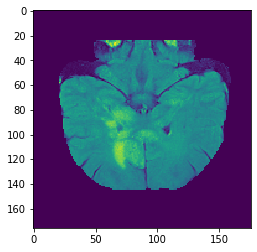

ValueError: ignored

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
img = data[126,:,:,0]
imgplot = plt.imshow(img)
plt.show()
plt.imsave('slice_126_4',img,cmap='gray')

Populating the interactive namespace from numpy and matplotlib


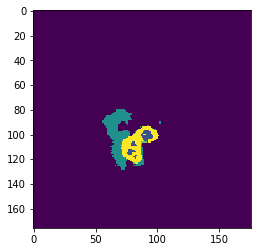

In [ ]:

%pylab inline
import matplotlib.pyplot as plt
img = Y_labels[:,126,:]
imgplot = plt.imshow(img)
plt.show()
#plt.imsave('slice_126_GT',img,cmap='gray')

In [ ]:
def model_gen(input_dim,x,y,slice_no):
  X1 = []
  X2 = []
  Y = []
  
  for i in range(int((input_dim)/2),y.shape[0]-int((input_dim)/2)):
    for j in range(int((input_dim)/2),y.shape[2]-int((input_dim)/2)):
      #Filtering all 0 patches
      if(x[i-16:i+17,j-16:j+17,:].any != 0):
        X2.append(x[i-16:i+17,j-16:j+17,:])
        X1.append(x[i-int((input_dim)/2):i+int((input_dim)/2)+1,j-int((input_dim)/2):j+int((input_dim)/2)+1,:])
        Y.append(y[i,slice_no,j])
      
      
  X1 = np.asarray(X1)
  X2 = np.asarray(X2)
  Y = np.asarray(Y)
  d = [X1,X2,Y]
  return d

In [ ]:
def data_gen(data,y,slice_no,model_no):
  d = []
  x = data[slice_no]
  #filtering all 0 slices and non-tumor slices
  if(x.any() != 0 and y.any() != 0):
    if(model_no == 0):
      X1 = []
      for i in range(16,159):
        for j in range(16,199):
          if(x[i-16:i+17,j-16:j+17,:].all != 0):
            X1.append(x[i-16:i+17,j-16:j+17,:])
      Y1 = []
      for i in range(16,159):
        for j in range(16,199):
          if(x[i-16:i+17,j-16:j+17,:].all != 0):
            Y1.append(y[i,slice_no,j]) 
      X1 = np.asarray(X1)
      Y1 = np.asarray(Y1)
      d = [X1,Y1]
    elif(model_no == 1):
      d = model_gen(65,x,y,slice_no)
    elif(model_no == 2):
      d = model_gen(56,x,y,slice_no)
    elif(model_no == 3):
      d = model_gen(53,x,y,slice_no)  
    
  return d

/bin/bash: bazel: command not found


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Lambda,Concatenate
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.initializers import glorot_normal
#import pydot
from IPython.display import SVG
from tensorflow.keras import regularizers

from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model



In [ ]:
def two_path(X_input):
  # Local path Conv1
  X = Conv2D(64,(7,7),strides=(1,1),padding='valid', kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01) )(X_input)
  # Batch-norm
  X = BatchNormalization()(X)
  X1 = Conv2D(64,(7,7),strides=(1,1),padding='valid', kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X_input)
  X1 = BatchNormalization()(X1)
  # Max-out
  X = layers.Maximum()([X,X1])
  X = layers.Dropout(.5)(X)
  X = Conv2D(64,(4,4),strides=(1,1),padding='valid',activation='relu', kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X)
  
  # Global path
  X2 = Conv2D(160,(13,13),strides=(1,1),padding='valid', kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X_input)
  X2 = BatchNormalization()(X2)
  X21 = Conv2D(160,(13,13),strides=(1,1),padding='valid', kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X_input)
  X21 = BatchNormalization()(X21)
  # Max-out
  X2 = layers.Maximum()([X2,X21])
  X2 = layers.Dropout(.5)(X2)

  
  # Local path Conv2
  X3 = Conv2D(64,(3,3),strides=(1,1),padding='valid', kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X)
  X3 = BatchNormalization()(X3)
  X31 =  Conv2D(64,(3,3),strides=(1,1),padding='valid',  kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X)
  X31 = BatchNormalization()(X31)
  X = layers.Maximum()([X3,X31])
  X = layers.Dropout(.5)(X)

  X = Conv2D(64,(2,2),strides=(1,1),padding='valid',activation='relu', kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X)
  
  # Merging the two paths
  X = Concatenate()([X2,X])

  return X

In [ ]:
def input_cascade(input_shape1,input_shape2):
  
  X1_input = Input(input_shape1)
  # 1st two-path of cascade
  X1 = two_path(X1_input)
  X1 = Conv2D(5,(21,21),strides=(1,1),padding='valid',activation='relu', kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X1)
  X1 = BatchNormalization()(X1)
  
  X2_input = Input(input_shape2)
  # Concatenating the output of 1st to input of 2nd
  X2_input1 = Concatenate()([X1,X2_input])
  X2 = two_path(X2_input1)
  
  # Fully convolutional softmax classification including L1/L2 regularization
  X2 = Conv2D(5,(21,21),strides=(1,1),padding='valid',  kernel_regularizer=regularizers.l2(0.01),
               activity_regularizer=regularizers.l1(0.01))(X2)
  X2 = BatchNormalization()(X2)
  #X2 = Flatten()(X2)
  X2 = Activation('softmax')(X2)
  
  model = Model(inputs=[X1_input,X2_input],outputs=X2)
  return model

In [ ]:

m0 = two_path((33,33,4))
m0.summary()

ValueError: ignored

In [ ]:
m1 = input_cascade((65,65,4),(33,33,4))
m1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 65, 65, 4)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 59, 59, 64)   12608       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 59, 59, 64)   12608       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 59, 59, 64)   256         conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
from sklearn.utils import class_weight


In [ ]:
from keras import optimizers
import keras.backend as K


In [ ]:
from sklearn import metrics
from sklearn.utils import class_weight



In [ ]:
def data_gen_hg(path,slice_no,model_no):
  p = os.listdir(path)
  p.sort(key=str.lower)
  arr = []
  for i in range(len(p)):
    if 'more' in p[i] or 'OT' in p[i]:
      if p[i] != '.DS_Store':
        p1 = os.listdir(path+'/'+p[i])
        img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[0])
        y = sitk.GetArrayFromImage(img)    

    else:
      if p[i] != '.DS_Store':
        p1 = os.listdir(path+'/'+p[i])
        p1.sort()
        img = sitk.ReadImage(path + '/' + p[i]+'/'+p1[-1])
        arr.append(sitk.GetArrayFromImage(img))
  data = np.zeros((196,176,160,4))
  for i in range(196):
    data[i,:,:,0] = arr[0][:,i,:]
    data[i,:,:,1] = arr[1][:,i,:]
    data[i,:,:,2] = arr[2][:,i,:]
    data[i,:,:,3] = arr[3][:,i,:]
  x = data[slice_no]
  
  if(model_no == 0):
    X1 = []
    for i in range(16,159):
      for j in range(16,199):
        X1.append(x[i-16:i+17,j-16:j+17,:])
    Y1 = []
    for i in range(16,159):
      for j in range(16,199):
        Y1.append(y[i,slice_no,j]) 
    X1 = np.asarray(X1)
    Y1 = np.asarray(Y1)
    d = [X1,Y1]
  elif(model_no == 1):
    d = model_gen(65,x,y,slice_no)
  elif(model_no == 2):
    d = model_gen(56,x,y,slice_no)
  elif(model_no == 3):
    d = model_gen(53,x,y,slice_no)  
    
  return d

In [ ]:
def data_gen_lg(path,slice_no,model_no):
  p = os.listdir(path)
  p.sort(key=str.lower)
  arr = []
  for i in range(len(p)):
    if 'more' in p[i] or 'OT' in p[i]:
      if p[i] != '.DS_Store':
        p1 = os.listdir(path+'/'+p[i])
        img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[0])
        y = sitk.GetArrayFromImage(img)    

    else:
      if p[i] != '.DS_Store':
        p1 = os.listdir(path+'/'+p[i])
        p1.sort()
        img = sitk.ReadImage(path + '/' + p[i]+'/'+p1[-1])
        arr.append(sitk.GetArrayFromImage(img))
  data = np.zeros((196,176,216,4))
  for i in range(196):
    data[i,:,:,0] = arr[0][:,i,:]
    data[i,:,:,1] = arr[1][:,i,:]
    data[i,:,:,2] = arr[2][:,i,:]
    data[i,:,:,3] = arr[3][:,i,:]
  x = data[slice_no]
  
  if(model_no == 0):
    X1 = []
    for i in range(16,215):
      for j in range(16,199):
        X1.append(x[i-16:i+17,j-16:j+17,:])
    Y1 = []
    for i in range(16,215):
      for j in range(16,199):
        Y1.append(y[i,slice_no,j]) 
    X1 = np.asarray(X1)
    Y1 = np.asarray(Y1)
    d = [X1,Y1]
  elif(model_no == 1):
    d = model_gen(65,x,y,slice_no)
  elif(model_no == 2):
    d = model_gen(56,x,y,slice_no)
  elif(model_no == 3):
    d = model_gen(53,x,y,slice_no)  
    
  return d

In [ ]:
d = data_gen_hg('/content/drive/My Drive/BRATS-2/Image_Data/HG/0004',100,1)

In [ ]:
print(len(d[0]))

10752


In [ ]:
# d = []

# for i in range(1,3):
#   path = '/content/drive/My Drive/BRATS-2/Image_Data/LG/000' + str(i)
#   d.append(data_gen_lg(path, 100,1))
  


In [ ]:

y = np.zeros((10752,1,1,5))

for i in range(y.shape[0]):
  y[i,:,:,d[2][i]] = 1


sample = np.zeros((5,1))
for i in range(5):
  sample[i] = np.sum(y[:,:,:,i])
print(sample/np.sum(sample))

[[0.78552827]
 [0.0250186 ]
 [0.04938616]
 [0.11988467]
 [0.02018229]]


In [ ]:

# for i in range(4,6):
#   path = '/content/drive/My Drive/BRATS-2/Image_Data/HG/000' + str(i)
#   d.append(data_gen_hg(path, 100,1))
 


In [ ]:
# lengths_d = []
# for i in range(len(d)):
#   lengths_d.append(len(d[i][0]))
# print(lengths_d)

In [ ]:
# y = []
# for i in range(len(lengths_d)):
#   y.append(np.zeros((lengths_d[i],1,1,5)))



In [ ]:

# for j in range(len(d)):
#   for i in range(y[j].shape[0]):
#     y[j][i,:,:,d[j][2][i]] = 1
#   sample = np.zeros((5,1))
#   for i in range(5):
#     sample[i] = np.sum(y[j][:,:,:,i])
#   print(sample/np.sum(sample))



In [ ]:
X1 = np.asarray(d[0])
X1.shape

(10752, 65, 65, 4)

In [ ]:
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:

# for i in range(len(d)):

#     # Create the model based on the model type
#     # Create the optimizer
#     sgd = optimizers.SGD(lr=.005)


#     X1 = np.asarray(d[i][0])
#     X2 = np.asarray(d[i][1])

#     class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(d[i][2]),
#                                                  d[i][2])
#     m1.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy',f1])

#         # Compute quantities required for feature-wise normalization
#         # (std, mean, and principal components if ZCA whitening is applied).

#         # Fit the model on the batches generated by datagen.flow().
#     m1_info = m1.fit([X1,X2],y[i],epochs=20,batch_size=256,class_weight = class_weights)

#     m1.save('trial_InputCascade_acc.h5'+ i)

#     # Save model


In [ ]:
X2 = np.asarray(d[1])
X2.shape

(10752, 33, 33, 4)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(d[2]),
                                                 d[2])

class_weights



array([0.25460573, 7.99405204, 4.04971751, 1.66826998, 9.90967742])

In [ ]:
m1.input_shape


[(None, 65, 65, 4), (None, 33, 33, 4)]

In [ ]:
#K.clear_session()
print(X2.sum())

11776462582.0


In [ ]:
# m0.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy', f1])
# m0_info = m0.fit(X2,y,epochs=100,batch_size=1024,class_weight = class_weights)

In [ ]:
from sklearn.metrics import f1_score
sgd = tf.keras.optimizers.SGD(lr=.001, decay=.01, momentum=.9, clipnorm=1)
m1.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy',f1])


In [ ]:
K.clear_session()

In [ ]:
m1_info = m1.fit([X1,X2],y,epochs=20,batch_size=256,class_weight = class_weights)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10752 samples
Epoch 1/20
10752/10752 [==============================] - 35s 3ms/sample - loss: 618376.0060 - acc: 0.4680 - f1: 0.2319
Epoch 2/20
10752/10752 [==============================] - 26s 2ms/sample - loss: 289345.4219 - acc: 0.7472 - f1: 0.3743
Epoch 3/20
10752/10752 [==============================] - 26s 2ms/sample - loss: 212796.1161 - acc: 0.6785 - f1: 0.4789
Epoch 4/20
10752/10752 [==============================] - 26s 2ms/sample - loss: 171972.6648 - acc: 0.6659 - f1: 0.4971
Epoch 5/20
10752/10752 [==============================] - 26s 2ms/sample - loss: 147746.9866 - acc: 0.6741 - f1: 0.5156
Epoch 6/20
10752/10752 [==============================] - 26s 2ms/sample - loss: 132072.4243 - acc: 0.7099 - f1: 0.5463
Epoch 7/20
10752/10752 [==============================] - 26s 2ms/sample - loss: 121005.1382 - acc: 0.7314 - f1: 0.5773
Epoch 8/20
10752/10752 [===================

In [ ]:

m1.save('trial_InputCascade_acc.h5')

In [ ]:
import keras.losses
keras.losses.custom_loss = f1

In [ ]:
m1 = tf.keras.models.load_model('trial_InputCascade_acc.h5', custom_objects={'f1': f1})


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# info = []
# for i in range(0,data.shape[0]):
#   d = data_gen(data,Y_labels,i,3)
#   if(len(d) != 0):
#     y = np.zeros((d[2].shape[0],1,1,5))
#     for j in range(y.shape[0]):
#       y[j,:,:,d[2][j]] = 1
#     X1 = d[0]
#     X2 = d[1]
#     class_weights = class_weight.compute_class_weight('balanced',
#                                                       np.unique(d[2]),
#                                                       d[2])
#     print('slice no:'+str(i))
#     info.append(m1.evaluate([X1,X2],y,batch_size=256))

In [ ]:
import h5py
hf = h5py.File('info1_input.h5', 'w')
hf.create_dataset('dataset_1', data=info)
hf.close()

In [ ]:
hf = h5py.File('info1_input.h5', 'r')
X = hf.get('dataset_1')

In [ ]:

K.clear_session()

In [ ]:
fold = os.listdir('/content/drive/My Drive/BRATS-2/Image_Data/HG/')
fold.sort(key=str.lower) 
fold = fold[:3]
for path in fold:
    print(path)
    path = '/content/drive/My Drive/BRATS-2/Image_Data/HG/'+path
    p = os.listdir(path)
    p.sort(key=str.lower)
    arr = []
    
    # Reading from 4 images and creating 4 channel slice-wise 
    for i in range(len(p)):
      if 'more' in p[i] or 'OT' in p[i]:
        if p[i] != '.DS_Store':
          p1 = os.listdir(path+'/'+p[i])
          img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[0])
          Y_labels = sitk.GetArrayFromImage(img) 
      else:
        if p[i] != '.DS_Store':
          p1 = os.listdir(path+'/'+p[i])
          p1.sort()
          img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[-1])
          arr.append(sitk.GetArrayFromImage(img))
    data = np.zeros((Y_labels.shape[1],Y_labels.shape[0],Y_labels.shape[2],4))
    for i in range(Y_labels.shape[1]):
      data[i,:,:,0] = arr[0][:,i,:]
      data[i,:,:,1] = arr[1][:,i,:]
      data[i,:,:,2] = arr[2][:,i,:]
      data[i,:,:,3] = arr[3][:,i,:]
    print(data.shape)
    info = []
    print(data.shape[0])
    # Creating patches for each slice and training(slice-wise)
    for i in range(data.shape[0]):
      d = data_gen(data,Y_labels,i,1)
      if(len(d) != 0):
        y = np.zeros((d[2].shape[0],1,1,5))
        for j in range(y.shape[0]):
          y[j,:,:,d[2][j]] = 1
        X1 = d[0]
        X2 = d[1]
        class_weights = class_weight.compute_class_weight('balanced',
                                                          np.unique(d[2]),
                                                          d[2])
        print('slice no:'+str(i))
        info.append(m1.fit([X1,X2],y,epochs=5,batch_size=128,class_weight= class_weights))
        m1.save('trial_InputCascade_acc_001].h5')

0001
(216, 176, 160, 4)
216
slice no:20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10752 samples
Epoch 1/5
10752/10752 [==============================] - 34s 3ms/sample - loss: 59653.5571 - acc: 0.6481 - f1: 0.0434
Epoch 2/5
10752/10752 [==============================] - 27s 3ms/sample - loss: 32064.7671 - acc: 0.8883 - f1: 0.0535
Epoch 3/5
10752/10752 [==============================] - 27s 3ms/sample - loss: 23501.1536 - acc: 0.9203 - f1: 0.0912
Epoch 4/5
10752/10752 [==============================] - 27s 3ms/sample - loss: 18793.9645 - acc: 0.9375 - f1: 0.1415
Epoch 5/5
10752/10752 [==============================] - 27s 3ms/sample - loss: 15885.0380 - acc: 0.9473 - f1: 0.1953
slice no:21
Train on 10752 samples
Epoch 1/5
10752/10752 [==============================] - 27s 3ms/sample - loss: 17035.5735 - acc: 0.9542 - f1: 0.6776
Epoch 2/5
10752/10752 [==============================] - 27s 3ms/sample - loss: 14811.9193 - acc: 0.

In [ ]:
model = tf.keras.models.load_model('trial_InputCascade_acc_001].h5', custom_objects={'f1': f1})


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
path = '/content/drive/My Drive/BRATS-2/Image_Data/LG/0013'
p = os.listdir(path)
p.sort(key=str.lower)
arr = []
for i in range(len(p)):
    if 'more' in p[i] or 'OT' in p[i]:
      if p[i] != '.DS_Store':
        p1 = os.listdir(path+'/'+p[i])
        img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[0])
        Y_labels = sitk.GetArrayFromImage(img) 
    else:
      if p[i] != '.DS_Store':
        p1 = os.listdir(path+'/'+p[i])
        p1.sort()
        img = sitk.ReadImage(path+'/'+p[i]+'/'+p1[-1])
        arr.append(sitk.GetArrayFromImage(img))   
data = np.zeros((Y_labels.shape[1],Y_labels.shape[0],Y_labels.shape[2],4))
for i in range(Y_labels.shape[1]):
  data[i,:,:,0] = arr[0][:,i,:]
  data[i,:,:,1] = arr[1][:,i,:]
  data[i,:,:,2] = arr[2][:,i,:]
  data[i,:,:,3] = arr[3][:,i,:]
info = []
 
    
d = data_gen(data,Y_labels,110,1)
if(len(d) != 0):
  y = np.zeros((d[2].shape[0],1,1,5))
  for j in range(y.shape[0]):
    y[j,:,:,d[2][j]] = 1
  X1 = d[0]
  X2 = d[1]
  pred = model.predict([X1,X2],batch_size = 256) 
  pred = np.around(pred)
  #print(pred.shape)
  pred1 = np.argmax(pred.reshape(y.shape[0],5)[:,1:4],axis = 1)
  y2 = np.argmax(y.reshape(y.shape[0],5)[:,1:4],axis = 1)
  f1 = metrics.f1_score(y2,pred1,average='micro')
  print(f1)

0.9518614398422091


TypeError: ignored

In [ ]:

# m0.compile(optimizer='sgd',loss='categorical_hinge',metrics=[f1_score])
# m0.save('trial_0001_twopathcnn_f1.h5')
